<a href="https://colab.research.google.com/github/Felipepa9/MADSI/blob/main/SECCION_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CARGA Y PREPARACIÓN DEL DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 12
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
data_raw = pd.read_csv('/content/drive/MyDrive/MOD. Y SIST. INTELIGENTES/SECCION_3.csv')
data_raw.head()

,flight_date,maximum_payload_kg_qty
0,2022-01-01,18218
1,2022-01-29,17745
2,2022-03-24,17558
3,2022-05-18,14141
4,2022-07-30,18006


In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64964 entries, 0 to 64963
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   flight_date             64964 non-null  object
 1   maximum_payload_kg_qty  64964 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1015.2+ KB


In [4]:
data_raw['flight_date'] = pd.to_datetime(data_raw['flight_date'])

In [5]:
data_sorted = data_raw.sort_values(by='flight_date', ascending=True)
data_sorted.head()

,flight_date,maximum_payload_kg_qty
0,2022-01-01,18218
5183,2022-01-01,17028
20281,2022-01-01,17278
19629,2022-01-01,19228
57268,2022-01-01,15728


In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64964 entries, 0 to 64963
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   flight_date             64964 non-null  datetime64[ns]
 1   maximum_payload_kg_qty  64964 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1015.2 KB


In [7]:
# prompt: Promedia maximum_payload_kg_qty por día según flight_date y dame el valor en entero y llamalo df

df = data_sorted.groupby('flight_date')['maximum_payload_kg_qty'].mean().reset_index()
df['maximum_payload_kg_qty'] = df['maximum_payload_kg_qty'].astype(int)
df.head()

,flight_date,maximum_payload_kg_qty
0,2022-01-01,17155
1,2022-01-02,16905
2,2022-01-03,16892
3,2022-01-04,16907
4,2022-01-05,16863


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   flight_date             1096 non-null   datetime64[ns]
 1   maximum_payload_kg_qty  1096 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 17.3 KB


In [9]:
df.set_index('flight_date', inplace=True)

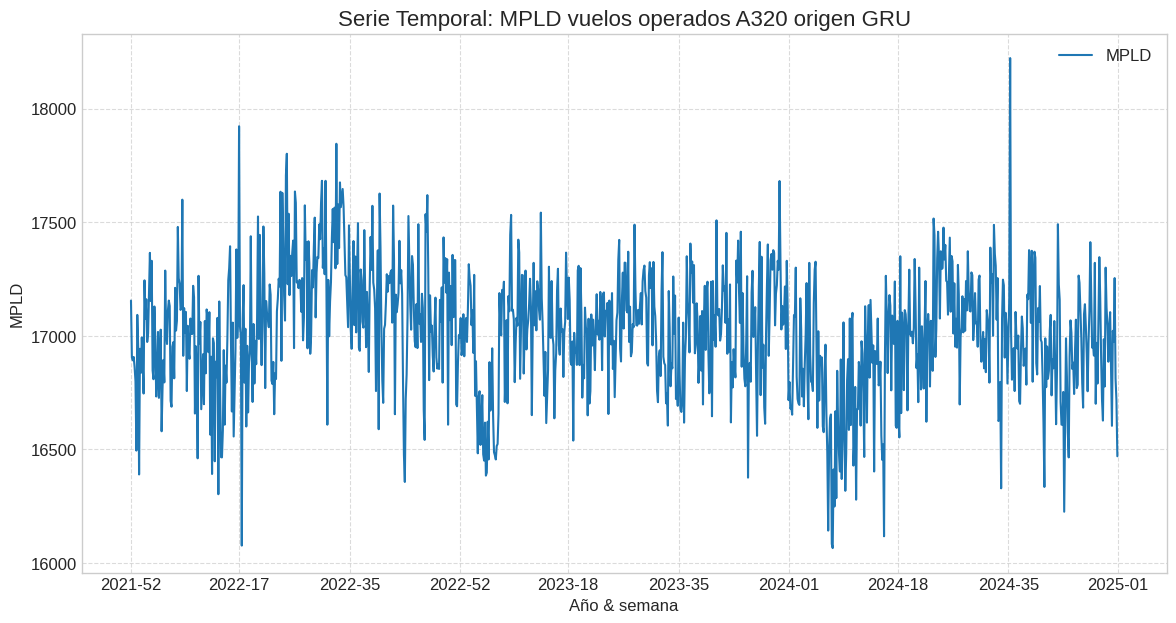

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['maximum_payload_kg_qty'], label='MPLD')
plt.title('Serie Temporal: MPLD vuelos operados A320 origen GRU', fontsize=16)
plt.xlabel('Año & semana', fontsize=12)
plt.ylabel('MPLD', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%G-%V'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator()) # Use AutoDateLocator for better spacing
plt.show()

Detección de Outliers con Bandas Estadísticas Móviles en maximum_payload_kg_qty


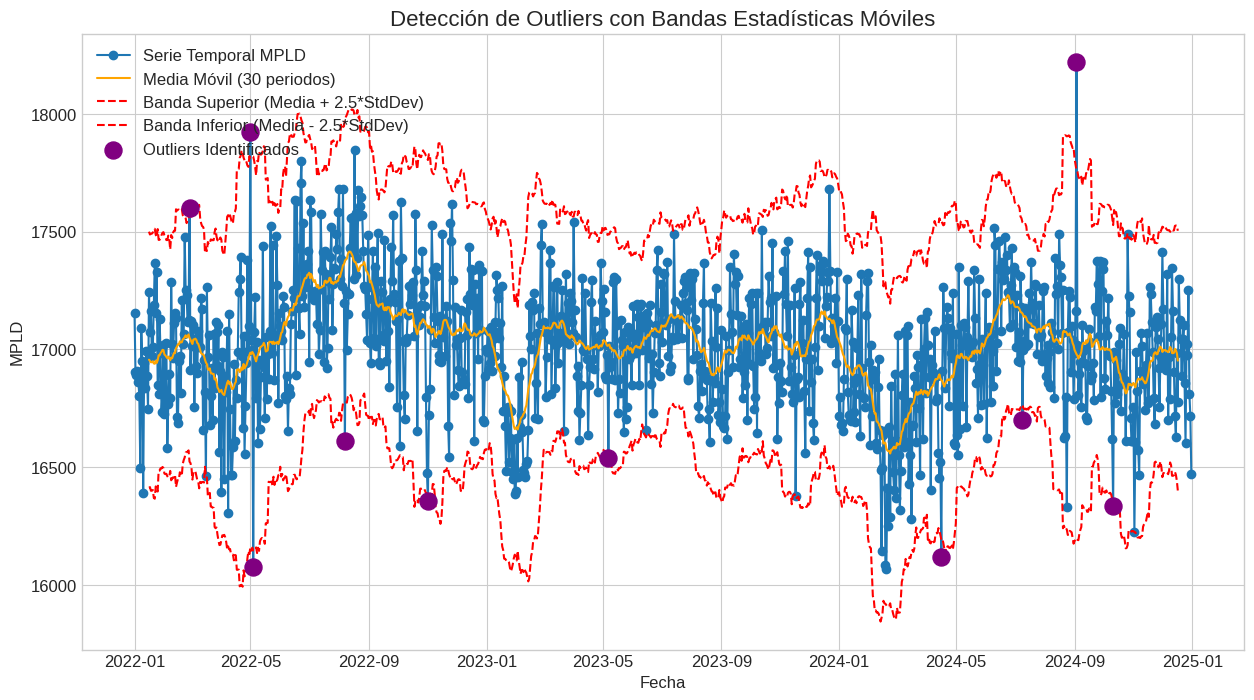


Outliers identificados:
             maximum_payload_kg_qty
flight_date                        
2022-02-27                    17599
2022-05-01                    17922
2022-05-04                    16077
2022-08-07                    16609
2022-11-01                    16357
2023-05-07                    16539
2024-04-16                    16118
2024-07-09                    16698
2024-09-03                    18222
2024-10-11                    16335

Original DataFrame shape: (1096, 1)
Cleaned DataFrame shape: (1086, 1)


,maximum_payload_kg_qty
flight_date,
2022-01-01,17155
2022-01-02,16905
2022-01-03,16892
2022-01-04,16907
2022-01-05,16863


In [11]:
if not df.empty and 'maximum_payload_kg_qty' in df.columns:
    print("Detección de Outliers con Bandas Estadísticas Móviles en maximum_payload_kg_qty")
    df_outliers = df.copy()


    window_size = 30
    rolling_mean = df_outliers['maximum_payload_kg_qty'].rolling(window=window_size, center=True).mean()
    rolling_std = df_outliers['maximum_payload_kg_qty'].rolling(window=window_size, center=True).std()

    k = 2.5
    upper_bound = rolling_mean + (k * rolling_std)
    lower_bound = rolling_mean - (k * rolling_std)

    identified_outliers = df_outliers[(df_outliers['maximum_payload_kg_qty'] > upper_bound) | (df_outliers['maximum_payload_kg_qty'] < lower_bound)]

    plt.figure(figsize=(15, 8))
    plt.plot(df_outliers.index, df_outliers['maximum_payload_kg_qty'], label='Serie Temporal MPLD', marker='o', linestyle='-')
    plt.plot(rolling_mean.index, rolling_mean, label=f'Media Móvil ({window_size} periodos)', color='orange')
    plt.plot(upper_bound.index, upper_bound, label=f'Banda Superior (Media + {k}*StdDev)', color='red', linestyle='--')
    plt.plot(lower_bound.index, lower_bound, label=f'Banda Inferior (Media - {k}*StdDev)', color='red', linestyle='--')

    if not identified_outliers.empty:
        plt.scatter(identified_outliers.index, identified_outliers['maximum_payload_kg_qty'], color='purple', s=150, zorder=5, label='Outliers Identificados')

    plt.title('Detección de Outliers con Bandas Estadísticas Móviles', fontsize=16)
    plt.xlabel('Fecha')
    plt.ylabel('MPLD')
    plt.legend(loc='upper left')
    plt.show()

    print("\nOutliers identificados:")
    if not identified_outliers.empty:
        print(identified_outliers)
    else:
        print("No se identificaron outliers con los criterios actuales.")

else:
    print("DataFrame vacío o sin columna 'maximum_payload_kg_qty', saltando detección de outliers.")

df_cleaned = df.drop(identified_outliers.index)

print("\nOriginal DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)


display(df_cleaned.head())

APLICACIÓN DE RNN CON KERAS

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import os
import datetime
import math

gpus = tf.config.list_physical_devices('GPU')

if gpus:
    print(f"\nUsando dispositivo: GPU ({len(gpus)} GPUs disponibles)")

else:
    print("\nUsando dispositivo: CPU")


Usando dispositivo: CPU


In [13]:
if not df_cleaned.empty and 'maximum_payload_kg_qty' in df_cleaned.columns:

    time_series_data = df_cleaned['maximum_payload_kg_qty']

    print("\nEscalado")
    scaler = MinMaxScaler(feature_range=(-1, 1))

    data_scaled = scaler.fit_transform(time_series_data.values.reshape(-1, 1))
    print(f"Datos escalados: {data_scaled.shape}")

    print("\nEntrenamiento y Prueba")

    train_size = int(len(data_scaled) * 0.70)
    test_size = len(data_scaled) - train_size

    train_data_scaled = data_scaled[0:train_size, :]
    test_data_scaled = data_scaled[train_size:len(data_scaled), :]

    print(f"Tamaño del conjunto de entrenamiento escalado: {len(train_data_scaled)}")
    print(f"Tamaño del conjunto de prueba escalado: {len(test_data_scaled)}")

    print("\nCreación de Secuencias")
    def create_sequences(input_data, sequence_length, target_steps=1):

        X, y = [], []
        for i in range(len(input_data) - sequence_length - (target_steps - 1)):
            seq_in = input_data[i:(i + sequence_length), 0]
            seq_out = input_data[(i + sequence_length):(i + sequence_length + target_steps), 0]
            X.append(seq_in)
            y.append(seq_out)
        return np.array(X), np.array(y)

    SEQUENCE_LENGTH = 12
    TARGET_STEPS = 1
    NUM_FEATURES = 1

    X_train, y_train = create_sequences(train_data_scaled, SEQUENCE_LENGTH, TARGET_STEPS)
    X_test, y_test = create_sequences(test_data_scaled, SEQUENCE_LENGTH, TARGET_STEPS)

    print(f"Forma de X_train: {X_train.shape}")
    print(f"Forma de y_train: {y_train.shape}")
    print(f"Forma de X_test: {X_test.shape}")
    print(f"Forma de y_test: {y_test.shape}")

    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], NUM_FEATURES)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], NUM_FEATURES)


    print(f"\nForma de X_train para Keras: {X_train.shape}")
    print(f"Forma de y_train para Keras: {y_train.shape}")

else:
    print("No se pudo cargar `df_cleaned` o falta la columna 'maximum_payload_kg_qty'. Saltando Preprocesamiento.")
    X_train, y_train, X_test, y_test = np.array([]), np.array([]), np.array([]), np.array([])


Escalado
Datos escalados: (1086, 1)

Entrenamiento y Prueba
Tamaño del conjunto de entrenamiento escalado: 760
Tamaño del conjunto de prueba escalado: 326

Creación de Secuencias
Forma de X_train: (748, 12)
Forma de y_train: (748, 1)
Forma de X_test: (314, 12)
Forma de y_test: (314, 1)

Forma de X_train para Keras: (748, 12, 1)
Forma de y_train para Keras: (748, 1)


In [14]:
INPUT_SIZE_RNN = NUM_FEATURES
HIDDEN_SIZE_RNN = 64
OUTPUT_SIZE_RNN = TARGET_STEPS

def crear_modelo_lstm_keras(input_shape, hidden_units, output_units, dropout_rate=0.0):
    model = Sequential()
    model.add(LSTM(hidden_units, input_shape=input_shape, dropout=dropout_rate, recurrent_dropout=dropout_rate))
    model.add(Dense(output_units))
    return model

def crear_modelo_gru_keras(input_shape, hidden_units, output_units, dropout_rate=0.0):
    model = Sequential()
    model.add(GRU(hidden_units, input_shape=input_shape, dropout=dropout_rate, recurrent_dropout=dropout_rate))
    model.add(Dense(output_units))
    return model

input_shape_rnn = (SEQUENCE_LENGTH, INPUT_SIZE_RNN)

dropout_val = 0.2 if False else 0.0

modelo_lstm_keras = crear_modelo_lstm_keras(input_shape_rnn, HIDDEN_SIZE_RNN, OUTPUT_SIZE_RNN, dropout_rate=dropout_val)
modelo_gru_keras = crear_modelo_gru_keras(input_shape_rnn, HIDDEN_SIZE_RNN, OUTPUT_SIZE_RNN, dropout_rate=dropout_val)

print("Modelo LSTM")
modelo_lstm_keras.summary()

print("\nModelo GRU (Keras)")
modelo_gru_keras.summary()

print("\nModelos RNN (Keras) definidos.")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Modelo LSTM


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)


Modelo GRU (Keras)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 64)             │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,929 (50.50 KB)

 Trainable params: 12,929 (50.50 KB)

 Non-trainable params: 0 (0.00 B)


Modelos RNN (Keras) definidos.


In [15]:
BATCH_SIZE = 64


--- Entrenando y Evaluando: LSTM (Keras) ---
Epoch 1/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 0.0874 - mse: 0.0874 - val_loss: 0.0757 - val_mse: 0.0757
Epoch 2/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0718 - mse: 0.0718 - val_loss: 0.0665 - val_mse: 0.0665
Epoch 3/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0684 - mse: 0.0684 - val_loss: 0.0654 - val_mse: 0.0654
Epoch 4/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0667 - mse: 0.0667 - val_loss: 0.0651 - val_mse: 0.0651
Epoch 5/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0623 - mse: 0.0623 - val_loss: 0.0649 - val_mse: 0.0649
Epoch 6/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0646 - mse: 0.0646 - val_loss: 0.0655 - val_mse: 0.0655
Epoch 7/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0639 - mse: 0.0639 - val_loss: 0.0650 - val_mse: 0.0650
Epoch 8/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0645 - mse: 0.0645 - val_loss: 0.0645 - val_mse: 0.0645
Epoch 9/15

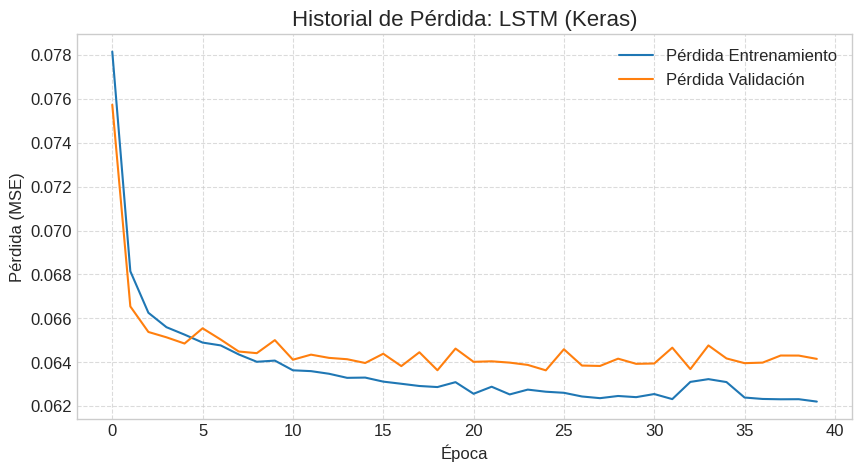


Mejor resultado para LSTM (Keras) en época 25: Pérdida Val (MSE) = 0.063633, RMSE Val = 0.2523

--- Entrenando y Evaluando: GRU (Keras) ---
Epoch 1/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.1072 - mse: 0.1072 - val_loss: 0.0944 - val_mse: 0.0944
Epoch 2/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0751 - mse: 0.0751 - val_loss: 0.0710 - val_mse: 0.0710
Epoch 3/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0663 - mse: 0.0663 - val_loss: 0.0652 - val_mse: 0.0652
Epoch 4/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0734 - mse: 0.0734 - val_loss: 0.0655 - val_mse: 0.0655
Epoch 5/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0646 - mse: 0.0646 - val_loss: 0.0663 - val_mse: 0.0663
Epoch 6/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0657 - mse: 0.0657 - val_loss: 0.0658 - val_mse: 0.0658
Epoch 7/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0605 - mse: 0.0605 - val_loss: 0.0651 - val_mse: 0.0651
Epoch 8/150
12/12 ━━━━━━━━━━━━━━━

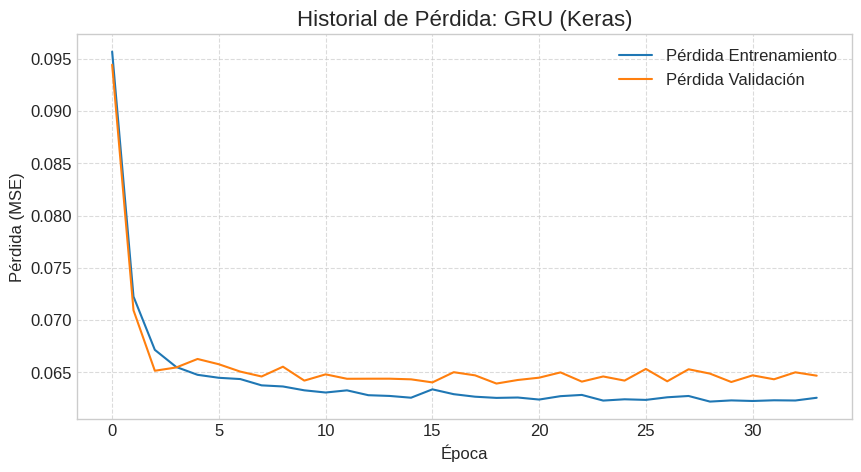


Mejor resultado para GRU (Keras) en época 19: Pérdida Val (MSE) = 0.063940, RMSE Val = 0.2529

--- Resumen de Resultados (Keras - Series Temporales) ---
LSTM: Mejor Pérdida Val (MSE) = 0.063633, RMSE Val = 0.2523
GRU:  Mejor Pérdida Val (MSE) = 0.063940, RMSE Val = 0.2529

El mejor modelo RNN (Keras) es: LSTM (Keras) con RMSE Val = 0.2523


In [16]:
from tensorflow.keras.callbacks import EarlyStopping

criterion_keras = 'mean_squared_error'

def entrenar_y_evaluar_rnn_keras(modelo_rnn, train_X_data, train_y_data, test_X_data, test_y_data,
                                criterio_loss_str, optimizador_rnn, num_epochs_val, batch_size_val,
                                nombre_modelo_str_val):
    print(f"\n--- Entrenando y Evaluando: {nombre_modelo_str_val} ---")

    modelo_rnn.compile(optimizer=optimizador_rnn, loss=criterio_loss_str, metrics=['mse'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

    history = modelo_rnn.fit(
        train_X_data, train_y_data,
        epochs=num_epochs_val,
        batch_size=batch_size_val,
        validation_data=(test_X_data, test_y_data),
        verbose=1,
        shuffle=True,
        callbacks=[early_stopping]
    )

    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
    plt.plot(history.history['val_loss'], label='Pérdida Validación')
    plt.title(f"Historial de Pérdida: {nombre_modelo_str_val}", fontsize=16)
    plt.xlabel('Época', fontsize=12); plt.ylabel('Pérdida (MSE)', fontsize=12)
    plt.legend(); plt.grid(True, linestyle='--', alpha=0.7); plt.show()


    best_val_loss_keras = min(history.history['val_loss'])
    best_epoch_keras = history.history['val_loss'].index(best_val_loss_keras) + 1
    best_val_rmse_keras = math.sqrt(best_val_loss_keras)

    print(f"\nMejor resultado para {nombre_modelo_str_val} en época {best_epoch_keras}: "
          f"Pérdida Val (MSE) = {best_val_loss_keras:.6f}, RMSE Val = {best_val_rmse_keras:.4f}")

    return modelo_rnn, history, best_val_loss_keras, best_val_rmse_keras


EPOCHS_RNN = 150
LEARNING_RATE_RNN = 0.001

if X_train.size > 0:
    optimizer_lstm_keras = Adam(learning_rate=LEARNING_RATE_RNN)
    modelo_lstm_keras, hist_lstm_keras, loss_lstm_keras, rmse_lstm_keras = entrenar_y_evaluar_rnn_keras(
        modelo_lstm_keras, X_train, y_train, X_test, y_test,
        criterion_keras, optimizer_lstm_keras,
        EPOCHS_RNN, BATCH_SIZE, "LSTM (Keras)"
    )

    optimizer_gru_keras = Adam(learning_rate=LEARNING_RATE_RNN)
    modelo_gru_keras, hist_gru_keras, loss_gru_keras, rmse_gru_keras = entrenar_y_evaluar_rnn_keras(
        modelo_gru_keras, X_train, y_train, X_test, y_test,
        criterion_keras, optimizer_gru_keras,
        EPOCHS_RNN, BATCH_SIZE, "GRU (Keras)"
    )

    print("\n--- Resumen de Resultados (Keras - Series Temporales) ---")
    print(f"LSTM: Mejor Pérdida Val (MSE) = {loss_lstm_keras:.6f}, RMSE Val = {rmse_lstm_keras:.4f}")
    print(f"GRU:  Mejor Pérdida Val (MSE) = {loss_gru_keras:.6f}, RMSE Val = {rmse_gru_keras:.4f}")

    if loss_lstm_keras < loss_gru_keras:
        mejor_modelo_rnn_keras = modelo_lstm_keras
        nombre_mejor_modelo_rnn_keras = "LSTM (Keras)"
        rmse_mejor_modelo_rnn_keras = rmse_lstm_keras
    else:
        mejor_modelo_rnn_keras = modelo_gru_keras
        nombre_mejor_modelo_rnn_keras = "GRU (Keras)"
        rmse_mejor_modelo_rnn_keras = rmse_gru_keras
    print(f"\nEl mejor modelo RNN (Keras) es: {nombre_mejor_modelo_rnn_keras} con RMSE Val = {rmse_mejor_modelo_rnn_keras:.4f}")
else:
    print("No se pudieron entrenar los modelos RNN debido a datos de entrenamiento vacíos.")
    mejor_modelo_rnn_keras, nombre_mejor_modelo_rnn_keras = None, "N/A"

Usando: LSTM (Keras) para la previsión.
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
RMSE de previsión en escala original: 224.38 kg


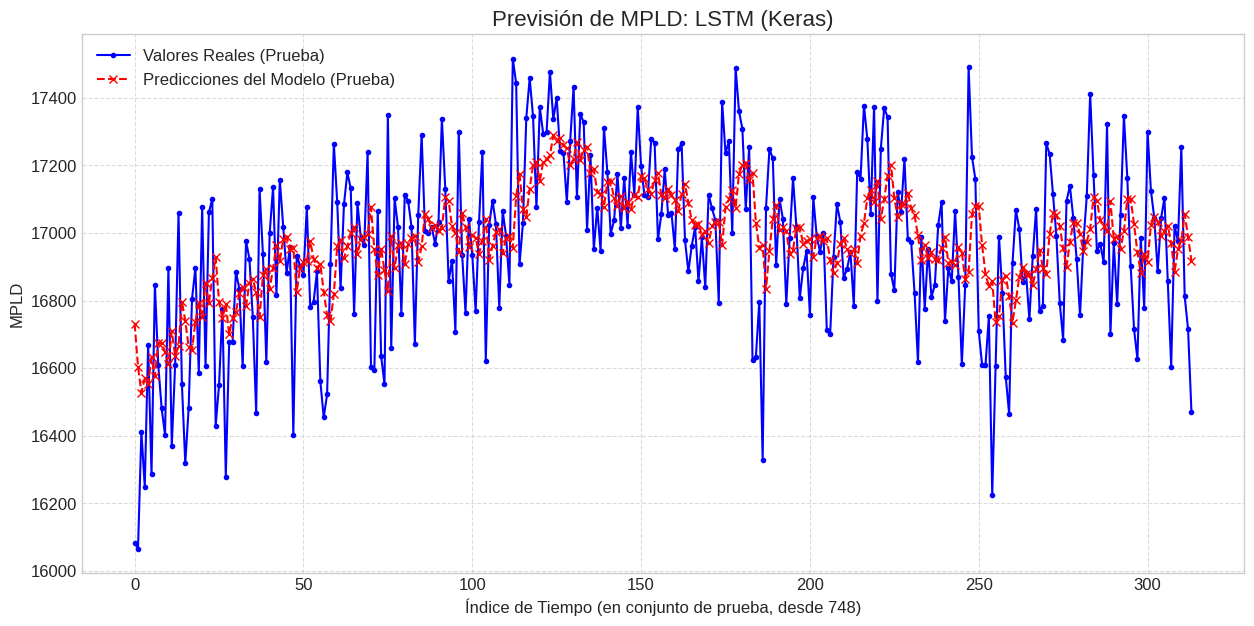

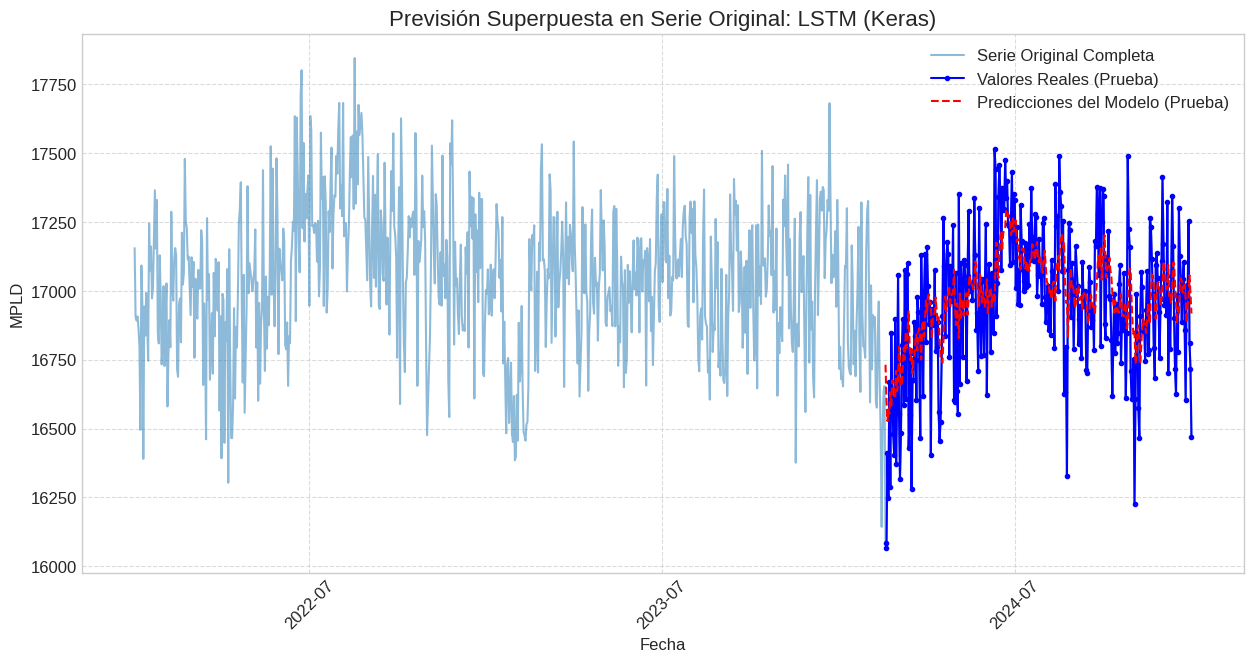

In [17]:
if mejor_modelo_rnn_keras is not None and X_test.size > 0 and 'scaler' in locals():
    print(f"Usando: {nombre_mejor_modelo_rnn_keras} para la previsión.")

    test_preds_scaled_np = mejor_modelo_rnn_keras.predict(X_test)

    test_preds_descaled = scaler.inverse_transform(test_preds_scaled_np)
    test_labels_descaled = scaler.inverse_transform(y_test)

    rmse_original_scale = math.sqrt(mean_squared_error(test_labels_descaled, test_preds_descaled))
    print(f"RMSE de previsión en escala original: {rmse_original_scale:.2f} kg")

    plt.figure(figsize=(15, 7))
    plt.plot(test_labels_descaled, label='Valores Reales (Prueba)', color='blue', marker='.')
    plt.plot(test_preds_descaled, label='Predicciones del Modelo (Prueba)', color='red', linestyle='--', marker='x')
    plt.title(f'Previsión de MPLD: {nombre_mejor_modelo_rnn_keras}', fontsize=16) # Adjusted title
    plt.xlabel(f'Índice de Tiempo (en conjunto de prueba, desde {train_size - SEQUENCE_LENGTH + (TARGET_STEPS-1) })', fontsize=12)
    plt.ylabel(f'MPLD', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    start_idx_test_original = train_size + SEQUENCE_LENGTH + (TARGET_STEPS -1)
    end_idx_test_original = start_idx_test_original + len(test_labels_descaled)
    test_dates = time_series_data.index[start_idx_test_original : end_idx_test_original]


    plt.figure(figsize=(15,7))
    plt.plot(time_series_data.index, time_series_data.values, label="Serie Original Completa", alpha=0.5)
    if len(test_dates) == len(test_labels_descaled):
        plt.plot(test_dates, test_labels_descaled, label='Valores Reales (Prueba)', color='blue', marker='.')
        plt.plot(test_dates, test_preds_descaled, label='Predicciones del Modelo (Prueba)', color='red', linestyle='--')
    else:
        print("Advertencia: Discrepancia de longitud entre test_dates y predicciones/etiquetas desescaladas. No se graficará la superposición detallada.")
        plt.plot(range(len(test_labels_descaled)), test_labels_descaled, label='Valores Reales (Prueba) - Índice numérico', color='blue', marker='.')
        plt.plot(range(len(test_preds_descaled)), test_preds_descaled, label='Predicciones (Prueba) - Índice numérico', color='red', linestyle='--')


    plt.title(f'Previsión Superpuesta en Serie Original: {nombre_mejor_modelo_rnn_keras}', fontsize=16)
    plt.xlabel('Fecha', fontsize=12)
    plt.ylabel(f'MPLD', fontsize=12)
    plt.legend()
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
else:
    print("No se puede realizar inferencia: modelo no entrenado, datos de prueba no disponibles o scaler no definido.")